In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('D:/Загрузки/data.csv',header=0,sep=';')
temp=df.copy() #Дупликат для работы и тестовых преобразований

In [4]:
df.closed_cred_sum

0           39.0
1        21543.0
2           36.0
3          941.0
4         2914.0
          ...   
49996     2620.0
49997    20028.0
49998    35022.0
49999    35022.0
50000      364.0
Length: 50001, dtype: float64

                                                1)Анализ данных

In [519]:
df.first_loan=df.first_loan.fillna(df.first_loan.median()) #заполняем небольшой обьем пропущенных элементов
df.corr()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert
closed_cred_sum,1.000000,0.479646,0.146282,0.473266,0.064003,0.120713,0.176027,0.003131,0.024942,0.124921,0.073999,-0.023184,0.108034,0.168220,0.001250,-0.053136,-0.101890
closed_creds,0.479646,1.000000,0.048055,0.248724,0.019147,0.028697,0.120045,0.004055,0.032629,0.100981,0.012278,-0.051700,0.148965,0.167763,-0.001281,-0.118488,-0.176177
active_cred_sum_overdue,0.146282,0.048055,1.000000,0.495836,0.399555,0.899418,0.075072,0.008659,-0.010994,0.008511,0.029206,0.001265,-0.002418,-0.033398,0.024086,0.005814,0.062256
active_cred_sum,0.473266,0.248724,0.495836,1.000000,0.207490,0.456020,0.155759,0.010678,0.033672,0.114509,0.074654,-0.017258,0.113089,0.099141,0.014990,-0.011603,-0.061843
active_cred_day_overdue,0.064003,0.019147,0.399555,0.207490,1.000000,0.302010,0.082953,0.069280,-0.044201,-0.019193,0.044206,0.007413,-0.066302,-0.093868,0.046900,-0.001850,0.176247
active_cred_max_overdue,0.120713,0.028697,0.899418,0.456020,0.302010,1.000000,0.071492,0.003447,-0.014175,0.009329,0.024855,0.002052,0.001190,-0.028800,0.019648,0.007704,0.051299
age,0.176027,0.120045,0.075072,0.155759,0.082953,0.071492,1.000000,0.088778,-0.045760,0.065089,-0.004003,-0.015674,-0.065260,0.158794,-0.010002,-0.150739,-0.226856
gender,0.003131,0.004055,0.008659,0.010678,0.069280,0.003447,0.088778,1.000000,0.008221,0.031071,0.040959,0.005118,-0.126111,0.002004,0.012458,0.045433,0.028480
region,0.024942,0.032629,-0.010994,0.033672,-0.044201,-0.014175,-0.045760,0.008221,1.000000,-0.009512,0.017646,-0.001391,-0.002105,-0.057057,0.012754,0.122569,0.090526
first_loan,0.124921,0.100981,0.008511,0.114509,-0.019193,0.009329,0.065089,0.031071,-0.009512,1.000000,0.759258,0.141175,0.023995,0.273179,0.039375,-0.047611,-0.041018


Корреляция показывает исключительно линейную зависимость. Я возьму в модель только те данные по столбцам которые больше 0.1 по модулю(Проверю возраст и регион на всякий случай, вдруг увижу нелинейную корреляцию). Как правило, чем больше мы используем данных косвенно или напрямую связанных с нашей целью, тем лучше будет результат. Но, надо понимать, что это всего лишь аппроксимация реального данных, а поэтому на яву у нас возможно не было б таких мощностей для поддержания такой модели.
Сlient_id  ложная корреляция,как и order_id(хотя есть небольшая вероятность того, что если бы я понимал процесс порождения данных, можно было б предположить о человеческом факторе)

<AxesSubplot:xlabel='active_cred_day_overdue', ylabel='expert'>

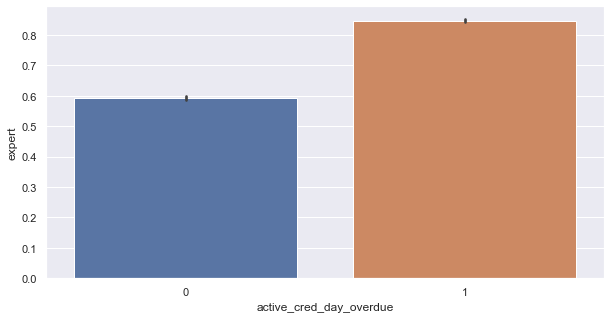

In [520]:
#Active_credit_day
temp.active_cred_day_overdue=temp.apply(lambda x:1 if x.active_cred_day_overdue>0 else 0,axis=1)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='active_cred_day_overdue',y='expert',data=temp)

Если у человека есть просрочка по кредиту -1 , нету 0. Видим прямую зависимость

In [521]:
#Gender
df.groupby(by=['gender'])['expert'].value_counts()

gender  expert
0       1         19822
        0          7044
1       1         17642
        0          5493
Name: expert, dtype: int64

Наблюдаем небольшую разницу между двумя гендарами.Меньше 2 процентов, так что этот столбец и зависимость незначительная для нашего таргета.

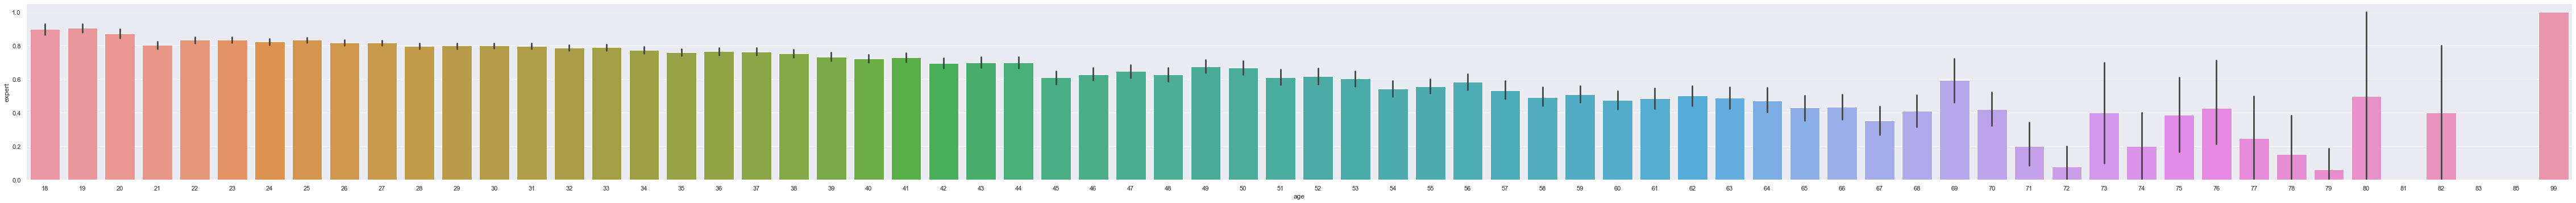

In [522]:
sns.set(rc={'figure.figsize':(80.27,5.7)})
a=sns.barplot(x='age',y='expert',data=df)

Видим зависимость, а так же выбросы на дальних участках возраста, надо почистить от шума, но только на трайн датасете. Тест оставляем в покое. Так же взглянем на распределение этого параметра.

<AxesSubplot:xlabel='age', ylabel='Count'>

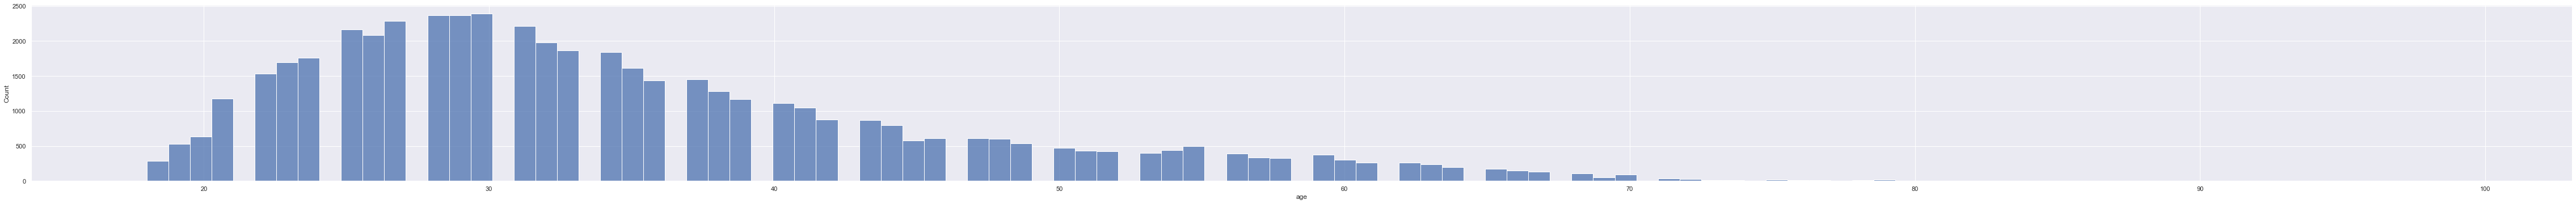

In [523]:
sns.histplot(df.age) # Видим распределение, похожее на нормальное, если мы удалим дальние выборсы.

Выдвинем предположение - чем больше человек брал кредитов в этой базе, тем больше процент успеха на получения в след. заявках
Для этого делаем небольшие преобразования в датасете

In [524]:
#Client_id
#Используем словарь, в которой записываем всех клиентов.
#Возвращаем количество раз,когда приходил клиент
def make_count(id):
    global id_voc
    if id in id_voc:
        id_voc[id]+=1
        return id_voc[id]
    else:
        id_voc[id]=1
        return id_voc[id]
        

<AxesSubplot:xlabel='id_count,expert'>

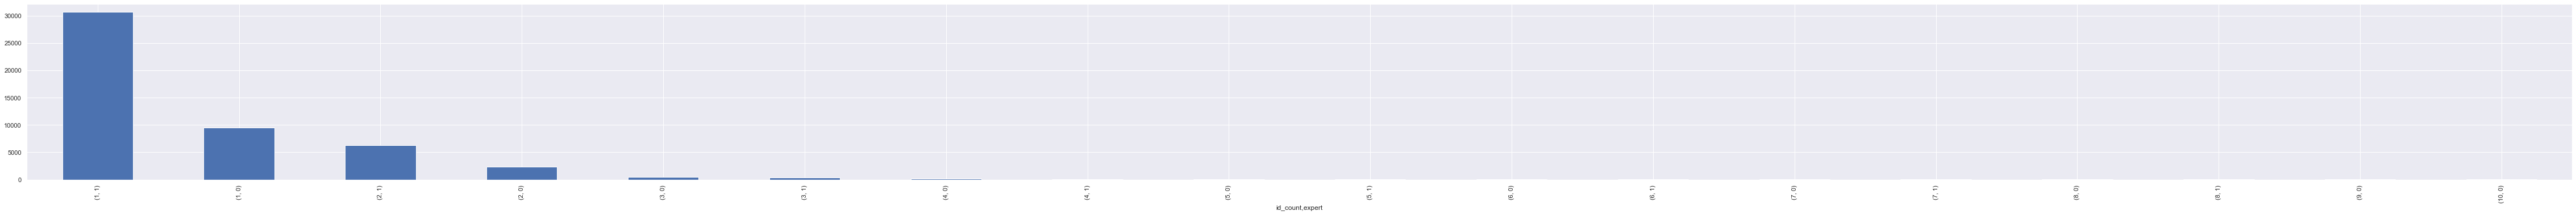

In [525]:
id_voc={}
temp['id_count']=temp.apply(lambda x:make_count(x.client_id),axis=1)
temp.groupby(['id_count'])['expert'].value_counts().plot(kind='bar')

Есть существенные и значимые отличия, начиная с 3 прихода от клиента.Если до этого успех соотносился с отказом примерно в пропорции 1:3,то после 3 прихода ~1:1. Но т.к. процент этого мал, мы этот параметр удалим из за возможного переобучения

<AxesSubplot:xlabel='close_credit_rank', ylabel='expert'>

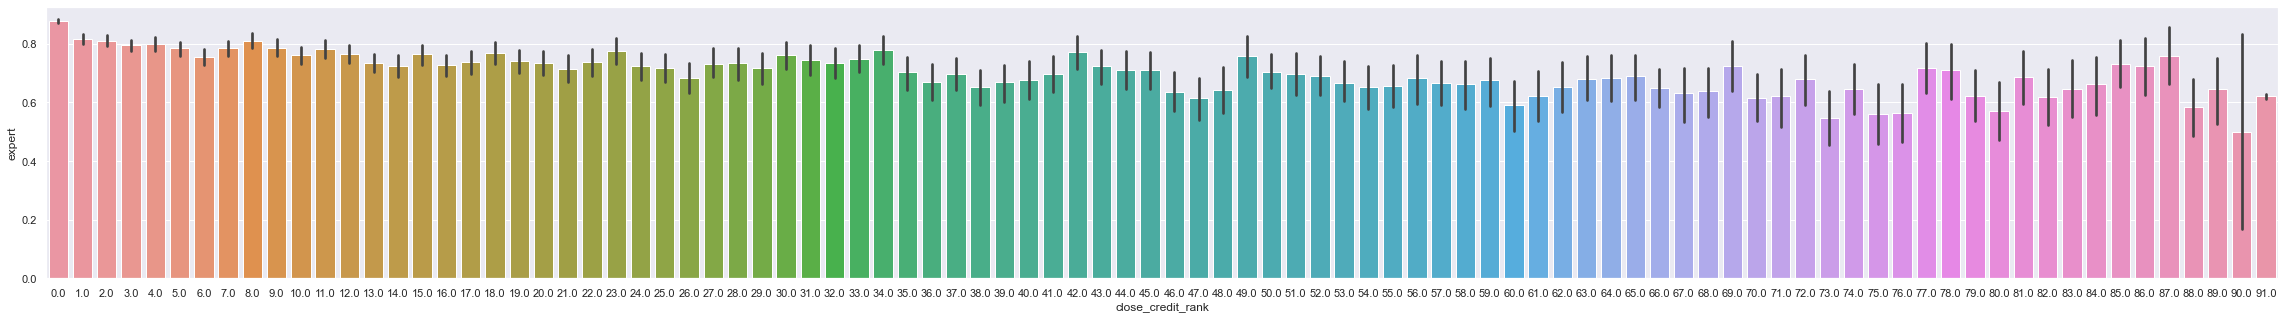

In [526]:
#Close_credit_rank
temp['close_credit_rank'] =temp.apply(lambda x:x.closed_cred_sum//3000 if x.closed_cred_sum<=270000 else 91 ,axis=1) 
sns.set(rc={'figure.figsize':(40,5)})
sns.barplot(x='close_credit_rank',y='expert',data=temp) 

Удалим выбросы 

In [527]:
#Cost_all
df.groupby(by=['expert'])['cost_all'].value_counts()

expert  cost_all 
0       0.00          3293
        1501.40        426
        2872.00        329
        4308.00        243
        2305.20        238
                     ...  
        131880.00        1
        208681.50        1
        209392.28        1
        238770.42        1
1       0.00         37464
Name: cost_all, Length: 2562, dtype: int64

Признак cost_all выбрасываем из модели, т.к. он заранее предопределяет исход нашего таргета(в 94,5 процентах случаев). Возможно он понадобиться нам для клиентов, которые приходят к нам в дальнейшем,но т.к. таких клиентов существенно меньше, чем остальных, делать на них акцент не целесообразно.Делаю вывод, что этот параметр появляется в базе данных уже после одобрение\неодобрение кредита, поэтому его использовать нельзя для прогноза.

<AxesSubplot:xlabel='month_income', ylabel='Count'>

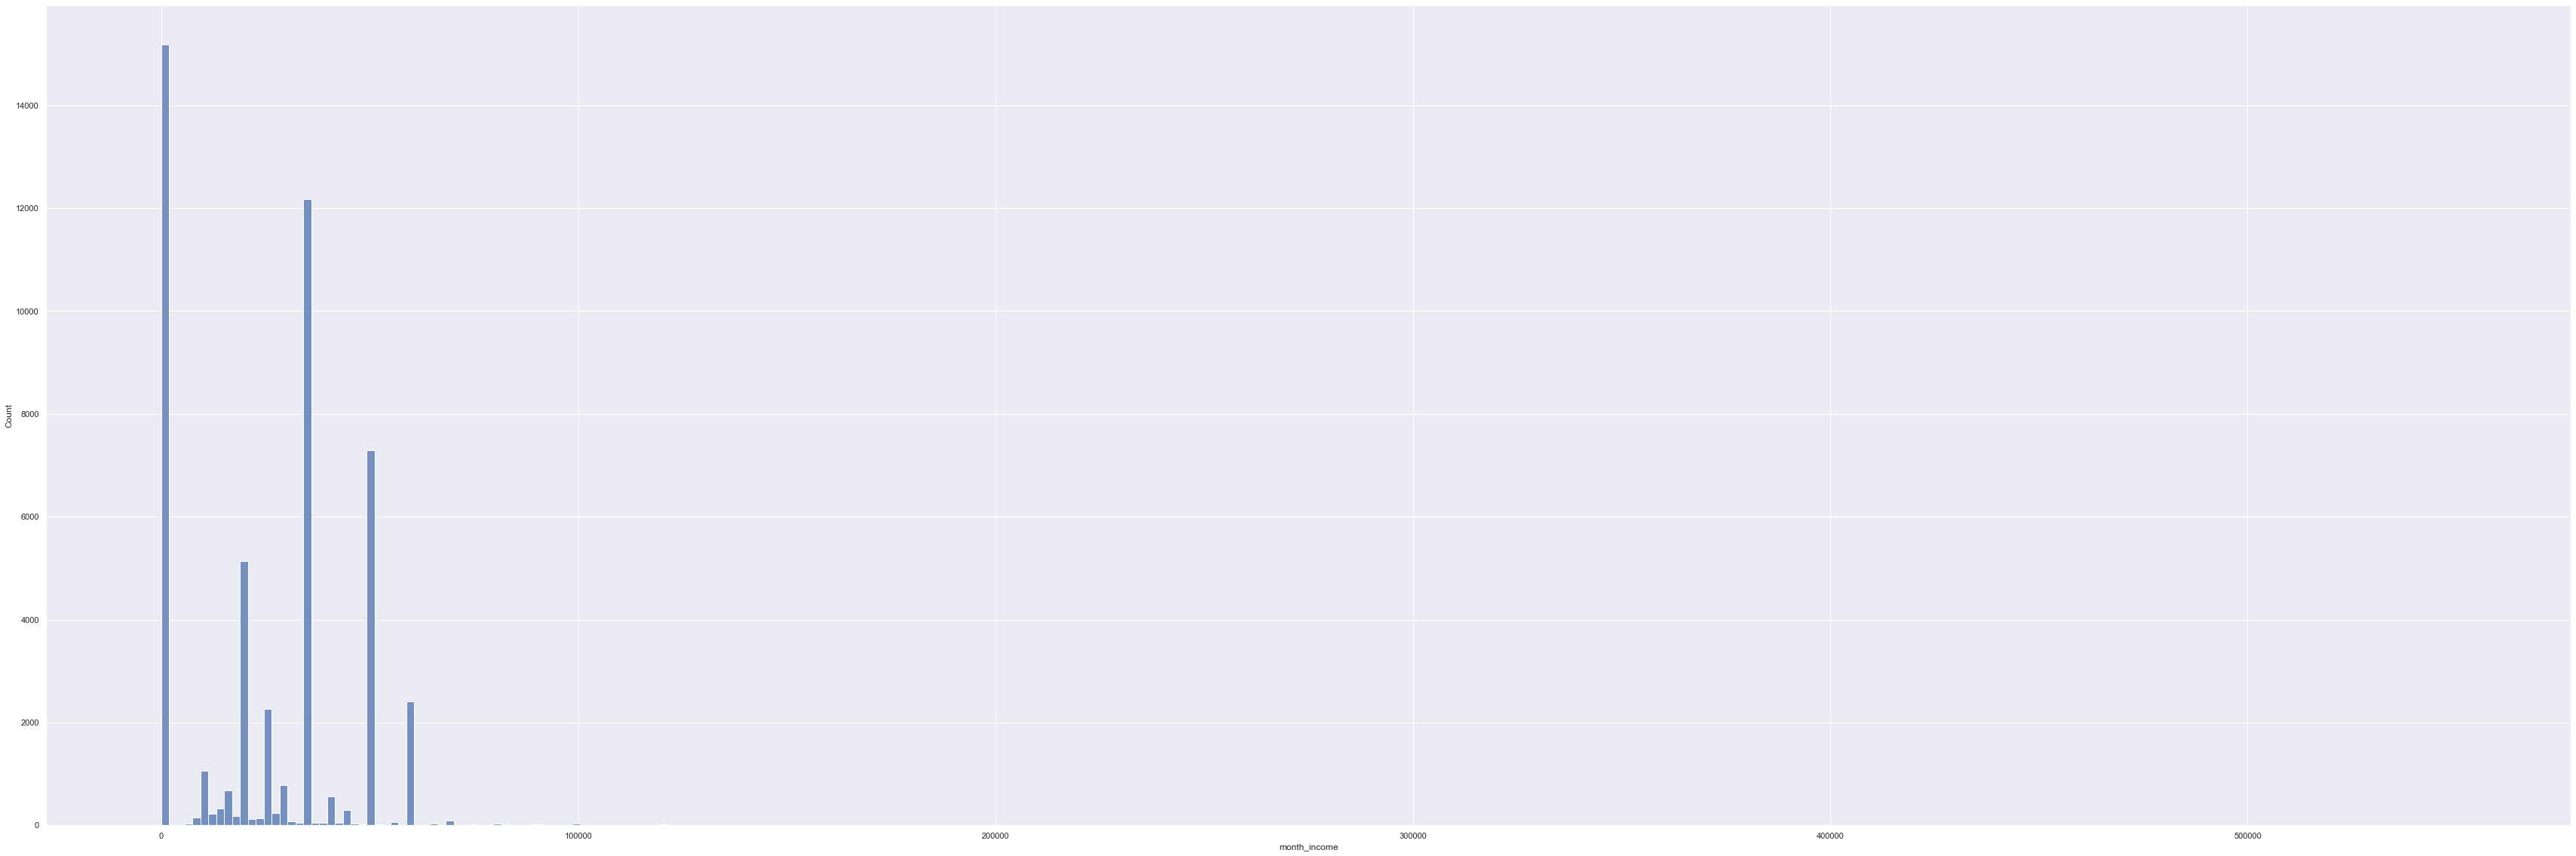

In [3]:
#Month_income
sns.set(rc={'figure.figsize':(60,20)})
sns.histplot(df.month_income)

Вижу выбросы, вижу основные классы, которые определяют порядка 80~ датасета и откровенные выбросы.

In [529]:
#Fisrt_loan
#Проанализируем разницу между ожидаемой суммой кредита клиента и реальным.
#Для это сравним два столбца, и если есть разница между ожиданием и одобренной суммой, то поставим маркер - 1, иначе 0
temp['dif']=temp.apply(lambda x:1 if x.first_loan-x.loan_cost_all!=0 else 0,axis=1)
print(temp.groupby(by=['dif'])['expert'].value_counts())

dif  expert
0    1         37356
     0          3786
1    0          8751
     1           108
Name: expert, dtype: int64


Видим прямую корреляцию. Если клиенту изменили сумму кредита , то почти всегда этот кредит одобрен.
Скорее всего, этот маркер проставляется уже постфактум одобрение\отказа кредита, поэтому убираем маркер (loan_cost_all)

20    14582
10     8508
14     5572
21     3647
7      3262
28     2557
15     1934
23     1246
16      867
12      743
Name: first_days_quant, dtype: int64


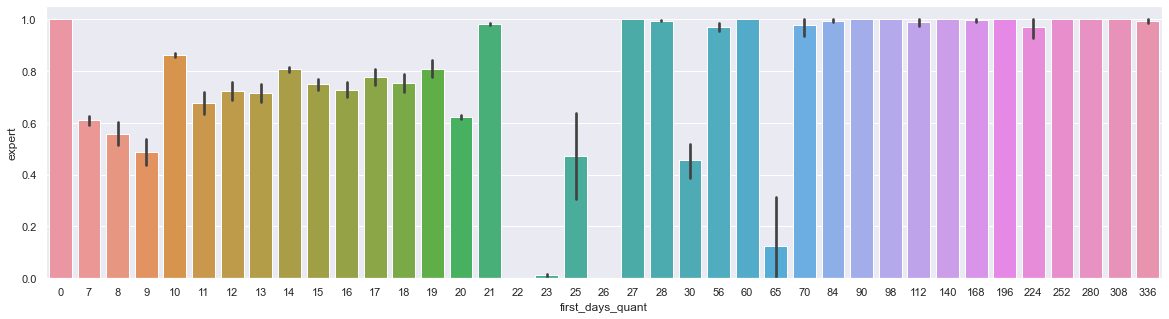

In [531]:
#first_days_quant
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='first_days_quant',y='expert',data=df)
print(df.first_days_quant.value_counts().head(10))

Разобьем данный столбец на 10-12 основных групп,удалим выбросы, остальные элементы пролейбируем новым классом.

0     20061
40     4185
36     1921
75     1778
65     1614
      ...  
44       19
85       17
43       16
21       11
9         7
Name: region, Length: 99, dtype: int64


<AxesSubplot:xlabel='region', ylabel='expert'>

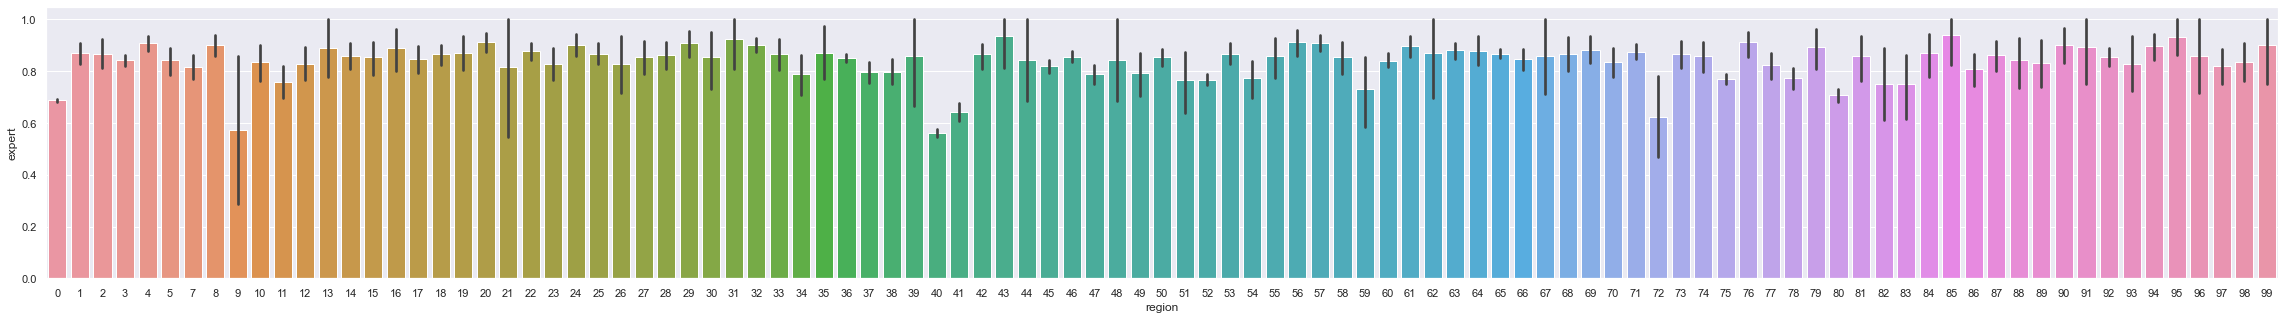

In [15]:
#region
print(df.region.value_counts())
sns.set(rc={'figure.figsize':(40,5)})
sns.barplot(x='region',y='expert',data=df)

<AxesSubplot:xlabel='closed_creds', ylabel='expert'>

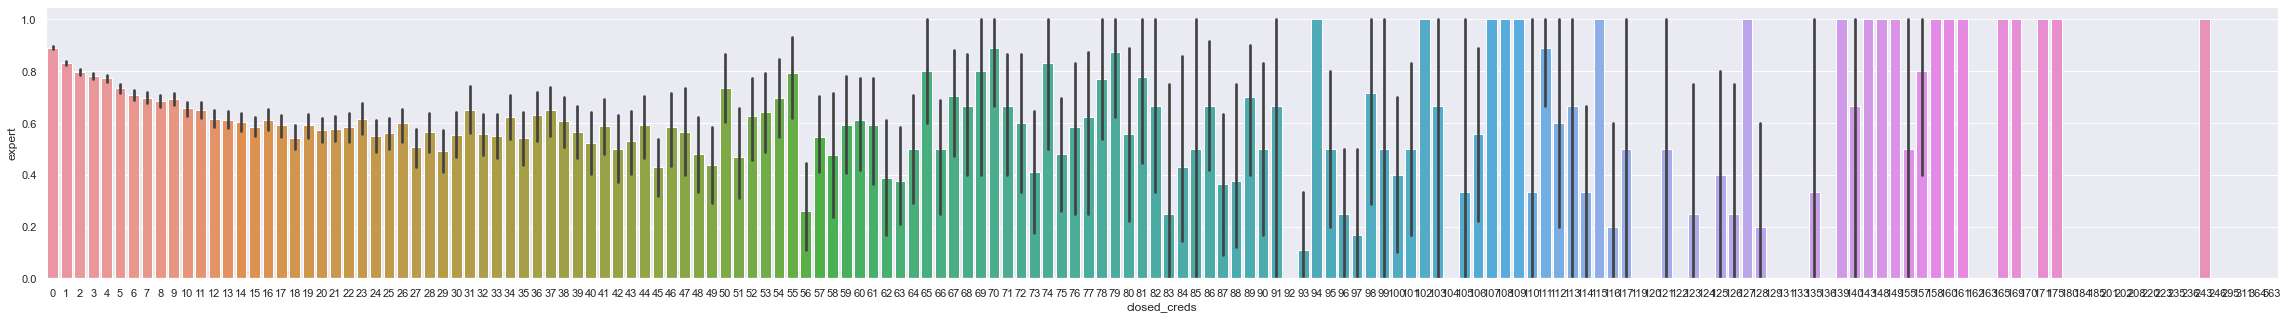

In [535]:
#Closed_creds
#Взглянем на основное распределение.
sns.set(rc={'figure.figsize':(40,5)})
sns.barplot(x='closed_creds',y='expert',data=df)

Видим зависимость и выбросы.

                                               Преобразование данных

                                                  2)Фильтрация

Разбиваем на 2 выборки, Train(мы обучаем),Test(проверка работоспособности модели). Разбиваем 8:1.Мы разбиваем данные на данном этапе, поскольку при фильтрации выбросы должны остаться на test\val выборке для корректной оценки модели. Некоторые колонки,которые на этапе анализа были выкинуты, добавлены обратно в силу того, что в результате проверок оказалось, что они имеют скорее всего нелинейную корреляцию с нашей моделью и повышают точность, не сильно нагружая ее.

In [8]:
df=df.drop(columns=['region','client_id','order_id','cost_all','loan_cost_all','order_date','gender'])

In [13]:
df

,active_cred_sum_overdue,age,month_income,expert
active_cred_sum_overdue,1.000000,0.075072,-0.002418,0.062256
age,0.075072,1.000000,-0.065260,-0.226856
month_income,-0.002418,-0.065260,1.000000,-0.239942
expert,0.062256,-0.226856,-0.239942,1.000000


In [12]:
from sklearn.model_selection import train_test_split
X, y = df.drop('expert', axis=1), df['expert'] 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

In [540]:
#Удаление данных по правилам 3 сигм только с train
from scipy import stats
index_=(np.abs(stats.zscore(X_train['age'])) < 3)
X_train=X_train[index_]
y_train=y_train[index_]

index_=(np.abs(stats.zscore(X_train['month_income'])) < 3)
X_train=X_train[index_]
y_train=y_train[index_]

index_=(np.abs(stats.zscore(X_train['closed_cred_sum'])) < 3)
X_train=X_train[index_]
y_train=y_train[index_]

index_=(np.abs(stats.zscore(X_train['closed_creds'])) < 3)
X_train=X_train[index_]
y_train=y_train[index_]


In [ ]:
#Разобьем доход месячный на 11 основных классов(Борьба с переобучением модели)
temp=[0.0,35000.0,50000.0,20000.0, 60000.0, 25000.0, 10000.0, 30000.0, 17000.0, 40000.0]
X_train.month_income = X_train.apply(lambda x:x.month_income if x.month_income in temp else 999,axis=1)
X_test.month_income = X_test.apply(lambda x:x.month_income if x.month_income in temp else 999,axis=1)

X_train = pd.get_dummies(X_train,columns=['month_income'],drop_first=True)
X_test = pd.get_dummies(X_test,columns=['month_income'],drop_first=True)

In [542]:
X_train.age = X_train.apply(lambda x: x.age//10 if x.age<50 else 99 ,axis=1)
X_test.age = X_test.apply(lambda x:  x.age//10 if x.age<50 else 99,axis=1)

X_train = pd.get_dummies(X_train,columns=['age'],drop_first=True)
X_test = pd.get_dummies(X_test,columns=['age'],drop_first=True)

                                                    3)Моделирование 

Скалируем это, для того , чтобы все параметры имели одинаковый входной вес. 

In [543]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [544]:
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef,make_scorer
# cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
# score=make_scorer(matthews_corrcoef)
# param_test = {                                                                
#  'bootstrap': [True,False],
#  'class_weight':['balanced'],
#  'max_depth': [2,5,10,30,70,None],
#  'criterion': ['gini','entropy'],
#  'max_features': ['auto','log2'],
#  'min_samples_leaf': [1,2,4,7],
#  'min_samples_split': [2, 3, 7],
#  'n_estimators': [20,70,140,250,400]
#               }
# clf = GridSearchCV(estimator= RandomForestClassifier(random_state=0),               
#  param_grid = param_test,verbose=4,n_jobs=-1,cv=cv,scoring=score).fit(X_train,y_train)
clf=RandomForestClassifier(random_state=0).fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Тюнинг занимает достаточно долго времени, но если тюнить, то для борьбы с переобучением я бы использовал именно такие параметры гридсерча для первого раза.Потом понять, в какую сторону развиваться(скорее всего в сторону естиматора 400 и глубины 20,30~.

                                                   5)Выбор метрики

Выбор падает на метрику Коэффициент корреляции Мэтьюза (МСС) из за:
Дисбаланса классов, и более точной оценки матрицы путаницы. Мне неизвестны очень многие параметры для выбора более качественной метрики, такие как маржа , доход, потеря кампании при невозврате кредита и т.д. Поэтому для сбалансированного решения вместо F1 score, принял решение брать MCC. Данная метрика при бинарной классификации варьируется от -1 к 1, где -1 реверсивный классификатор, 0 -случайный классификатор, 1 точное попадание в классы.

In [545]:
print(matthews_corrcoef(y_train, y_pred_train))
print(matthews_corrcoef(y_test, y_pred_test))

0.9985653340793226
0.7087869331783663


Для наглядности приведу пример метрики акурасити, но она не отражает нужности и полезности модели,но отражает количество правильно размеченных данных.

In [546]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9994767000706455
0.8936106389361064


Так же надо понимать, если не заниматься обрезанием данных и засовывать в нашу модель абсолютно все значения, и тюнить это,то результат окажется выше(машина разберется сама). НО(!) как я понимаю,это всего лишь аппроксимация данных и мы не имеем права в реальности все наши данные таким образом моделировать из за недостатка мощностей.

Оценка качества построенной модели. У нас есть количество лейблов, которое мы проставляем неправильно. Сравнить модельное количество ошибок 1 и 2 рода( когда клиент одобрен, а должен был быть в отказе и наобарот) и посчитать убытки, сколько мы потеряли как компания на этом . Тоже самое проделать при ручной классификации. 
Данную модель можно улучшить, если
1)Понять происхождение данных(бизнес процессов)
2)Попробовать более точные метрики, которые используют другие входные данные(Например доход, потерю, маржу и т.д.)
3)Более точно потюнить модель,избавиться от параметров для борьбы с переобучением.